<a href="https://colab.research.google.com/github/rushikeshnakhate/PortfoliOpt/blob/master/expected_return_df_And_optimization_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [92]:
import yfinance as yf
import pandas as pd
import numpy as np
from pathlib import Path
import os
output_dir = Path("/content/drive/MyDrive/")
import matplotlib.pyplot as plt
# !pip install tqdm
# !pip install PyPortfolioOpt
# !pip install tabulate
# !pip install dtale
# !pip install -q data-table
import scipy.optimize as sci_opt
from tqdm import tqdm  # Import the tqdm progress b
from google.colab import data_table

In [97]:
optimization_pkl_filepath = os.path.join(output_dir, "optimization.pkl")
post_processing_wright_pkl_filepath = os.path.join(output_dir, "post_processing_wright.pkl")
performance_pkl_filepath = os.path.join(output_dir, "performance.pkl")
data_pkl_filepath = os.path.join(output_dir, "data.pkl")
expected_return_pkl_filepath = os.path.join(output_dir, "expected_return.pkl")

In [98]:
start_date = '2024-01-01'
end_date = '2024-01-30'
previous_end_date = '2024-01-29'
data = pd.read_pickle(data_pkl_filepath)
expected_return_df = pd.read_pickle(expected_return_pkl_filepath)
optimized_df = pd.read_pickle(optimization_pkl_filepath)
post_processing_wright_df = pd.read_pickle(post_processing_wright_pkl_filepath)
performance_df = pd.read_pickle(performance_pkl_filepath)

In [99]:
from google.colab import data_table

# Assuming df is your DataFrame
def clean_metadata(value):
    if isinstance(value, pd.Series):
        return value.values  # Extract just the values
    elif isinstance(value, list):
        return [str(v) for v in value]  # Convert each element to string for clarity
    return value

def extract_value(value):
    # Check if the value is a list and has only one element, then extract it
    # print(type(value))
    if isinstance(value, (np.ndarray, list)) and len(value) == 1:
        return value[0]
    # elif isinstance(value, tuple) and len(value) >= 2:
    #   return value[1]
    return value  # Return the value as-is if not a list

# Apply this function to every cell in the DataFrame
df1 = optimized_df.applymap(clean_metadata)
optimized_df_cleaned = df1.applymap(extract_value)

<ipython-input-99-78e2a701d7f1>:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df1 = optimized_df.applymap(clean_metadata)
<ipython-input-99-78e2a701d7f1>:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  optimized_df_cleaned = df1.applymap(extract_value)


In [100]:
def calculate_portfolio_return_by_expected_retuern(optimized_df_cleaned):
  import pandas as pd
  # Assuming optimized_df_cleaned and expected_return_df are already loaded

  # Since the tickers are in the index of expected_return_df, no need for a 'Ticker' column
  # Proceed with calculating portfolio expected returns by combining weights with individual stock returns from expected_return_df

  # Ensure the 'Weights' column is properly formatted (if needed)
  def convert_to_dict(value):
      if isinstance(value, str):  # If the value is a string, apply eval
          return eval(value)
      return value  # If already a dictionary, return as is

  # Apply the conversion function to ensure weights are dictionaries
  optimized_df_cleaned['Weights'] = optimized_df_cleaned['Weights'].apply(convert_to_dict)

  # Now calculate the portfolio expected returns
  for i, row in optimized_df_cleaned.iterrows():
      weights = row['Weights']  # Get the weights dictionary
      portfolio_return = 0
      for ticker, weight in weights.items():
          if ticker in expected_return_df.index:  # Since tickers are in the index
              # Get the expected return for this ticker from expected_return_df (using CAGRMeanHistorical for example)
              stock_return = expected_return_df.loc[ticker, 'CAGRMeanHistorical']
              portfolio_return += weight * stock_return

      # Add the calculated portfolio return to a new column in optimized_df_cleaned
      optimized_df_cleaned.at[i, 'CalculatedPortfolioReturn'] = portfolio_return

  # Calculate correlation between 'CalculatedPortfolioReturn' and 'Expected Annual Return' in optimized_df_cleaned
  correlation = optimized_df_cleaned['CalculatedPortfolioReturn'].corr(optimized_df_cleaned['Expected Annual Return'])
optimized_df_cleaned_org = optimized_df_cleaned.copy()
calculate_portfolio_return_by_expected_retuern(optimized_df_cleaned_org)

In [101]:
# # data_table.DataTable(optimized_df_cleaned[optimized_df_cleaned['Expected Return Type'] != 'CAGRMeanHistorical'])
# print(optimized_df_cleaned.describe)
# print(optimized_df_cleaned1.describe)
data_table.DataTable(optimized_df_cleaned_org.head(2))

,Expected Return Type,Risk Model,Optimizer,Weights,Expected Annual Return,Annual Volatility,Sharpe Ratio,CalculatedPortfolioReturn
0,CAGRMeanHistorical,SampleCovariance,pyPortfolioOptFrontier,"{'ASIANPAINT.NS': 0.0, 'BAJAJFINSV.NS': 0.0, '...",9.714411,1.988931e-01,4.874182e+01,9.714454
1,CAGRMeanHistorical,SampleCovariance,pyPortfolioOptFrontierWithShortPosition,"{'ASIANPAINT.NS': 0.5488, 'BAJAJFINSV.NS': 0.1...",1.791481,1.673002e-09,1.058864e+09,1.791492


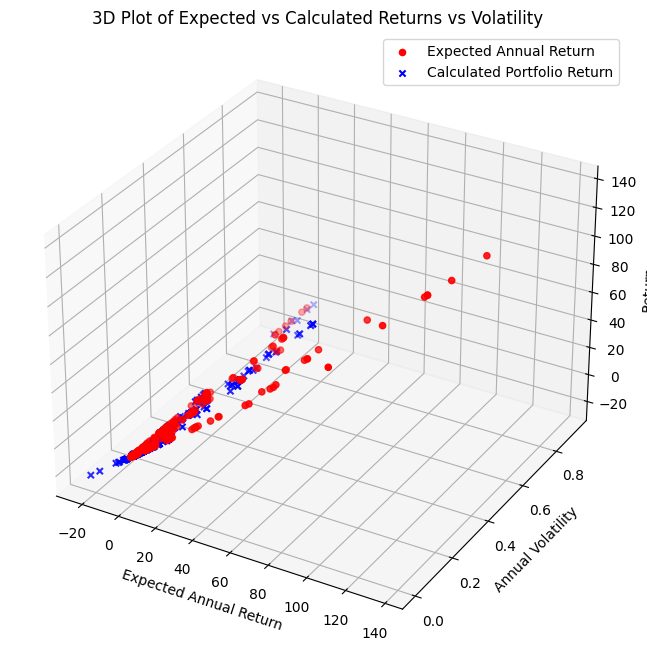

In [102]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

df = optimized_df_cleaned_org

# 3D Plot for Expected vs Calculated Returns vs Annual Volatility
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for Expected Returns in red
ax.scatter(df['Expected Annual Return'], df['Annual Volatility'], df['Expected Annual Return'], color='r', marker='o', label='Expected Annual Return')

# Scatter plot for Calculated Returns in blue
ax.scatter(df['CalculatedPortfolioReturn'], df['Annual Volatility'], df['CalculatedPortfolioReturn'], color='b', marker='x', label='Calculated Portfolio Return')

# Adding labels to each axis
ax.set_xlabel('Expected Annual Return')
ax.set_ylabel('Annual Volatility')
ax.set_zlabel('Return')

# Adding a title and a legend
ax.set_title('3D Plot of Expected vs Calculated Returns vs Volatility')
ax.legend()

# Show plot
plt.show()


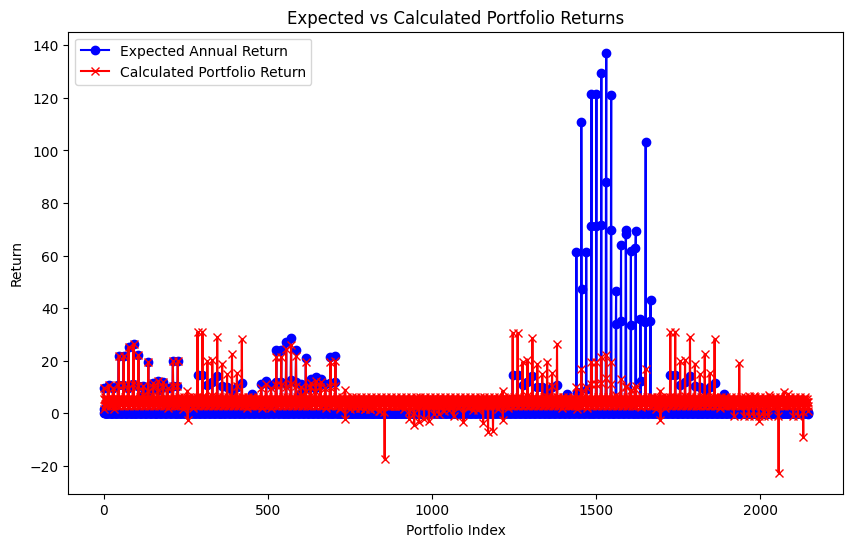

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
df = optimized_df_cleaned_org
# Plot the two lines for Expected Annual Return and Calculated Portfolio Return
plt.figure(figsize=(10, 6))

# Line for Expected Annual Return
plt.plot(df.index, df['Expected Annual Return'], label='Expected Annual Return', color='blue', marker='o')

# Line for Calculated Portfolio Return
plt.plot(df.index, df['CalculatedPortfolioReturn'], label='Calculated Portfolio Return', color='red', marker='x')

# Adding titles and labels
plt.title('Expected vs Calculated Portfolio Returns')
plt.xlabel('Portfolio Index')
plt.ylabel('Return')

# Adding a legend to differentiate the two lines
plt.legend()

# Show the plot
plt.show()


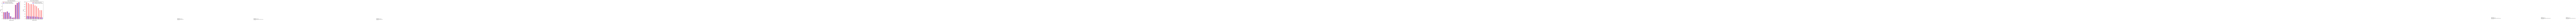

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
df  = optimized_df_cleaned_org
# Assuming optimized_df_cleaned is already loaded and contains 'Expected Annual Return', 'CalculatedPortfolioReturn', etc.

# Calculate the absolute difference between Expected Annual Return and CalculatedPortfolioReturn
df['Difference'] = (df['Expected Annual Return'] - df['CalculatedPortfolioReturn']).abs()

# Sort by the difference to find best and worst matches
best_matches = df.nsmallest(10, 'Difference')  # Smallest differences (best matches)
worst_matches = df.nlargest(10, 'Difference')  # Largest differences (worst matches)

# Select relevant columns to show for printing
columns_to_display = ['Expected Return Type', 'Risk Model', 'Optimizer', 'Expected Annual Return', 'CalculatedPortfolioReturn', 'Difference']

# Get the top 3 best and worst matches for displaying the details
top_3_best = best_matches.head(3)
top_3_worst = worst_matches.head(3)

# Plot top 10 best matches
plt.figure(figsize=(10, 5))  # Reduced figure size to prevent rendering issues

# Bar plot for Best Matches with slight offset to show both bars clearly
plt.subplot(1, 2, 1)
bar_width = 0.35
indices = range(len(best_matches))

plt.bar([i - bar_width/2 for i in indices], best_matches['Expected Annual Return'], width=bar_width, color='red', alpha=0.6, label='Expected Annual Return')
plt.bar([i + bar_width/2 for i in indices], best_matches['CalculatedPortfolioReturn'], width=bar_width, color='blue', alpha=0.6, label='Calculated Portfolio Return')
plt.title('Top 10 Best Matches')
plt.xlabel('Portfolio Index')
plt.ylabel('Return')
plt.xticks(indices, best_matches.index, fontsize=8)
plt.legend()

# Display details of top 3 best matches at the bottom
for i, row in top_3_best.iterrows():
    plt.text(i - 0.5, -2, f"Index: {i}\nType: {row['Expected Return Type']}\nOptimizer: {row['Optimizer']}\nDiff: {row['Difference']:.4f}",
             horizontalalignment='left', verticalalignment='bottom', fontsize=6)

# Bar plot for Worst Matches with slight offset to show both bars clearly
plt.subplot(1, 2, 2)
indices = range(len(worst_matches))

plt.bar([i - bar_width/2 for i in indices], worst_matches['Expected Annual Return'], width=bar_width, color='red', alpha=0.6, label='Expected Annual Return')
plt.bar([i + bar_width/2 for i in indices], worst_matches['CalculatedPortfolioReturn'], width=bar_width, color='blue', alpha=0.6, label='Calculated Portfolio Return')
plt.title('Top 10 Worst Matches')
plt.xlabel('Portfolio Index')
plt.ylabel('Return')
plt.xticks(indices, worst_matches.index, fontsize=8)
plt.legend()

# Display details of top 3 worst matches at the bottom
for i, row in top_3_worst.iterrows():
    plt.text(i - 0.5, -2, f"Index: {i}\nType: {row['Expected Return Type']}\nOptimizer: {row['Optimizer']}\nDiff: {row['Difference']:.4f}",
             horizontalalignment='left', verticalalignment='bottom', fontsize=6)

# Adjust layout and avoid tight layout issues
plt.subplots_adjust(left=0.05, right=0.95, wspace=0.3)

# Show the plot
plt.show()

# Print the full details of the top 3 best and worst matches
print("Top 3 Best Matches:")
print(top_3_best[columns_to_display])

print("\nTop 3 Worst Matches:")
print(top_3_worst[columns_to_display])


In [137]:
# Print the full details of the top 3 best and worst matches
print("Top 3 Best Matches:")
data_table.DataTable(best_matches)

Top 3 Best Matches:


,Expected Return Type,Risk Model,Optimizer,Weights,Expected Annual Return,Annual Volatility,Sharpe Ratio,CalculatedPortfolioReturn,Difference,Match Classification
225,CAGRMeanHistorical,RegimeSwitchingRiskModel,pyPortfolioOptFrontier,"{'ASIANPAINT.NS': 0.0, 'BAJAJFINSV.NS': 0.0, '...",10.461502,1.175561e-02,8.882140e+02,10.461504,0.000002,Best
105,CAGRMeanHistorical,OracleApproximatingShrinkage,pyPortfolioOptFrontier,"{'ASIANPAINT.NS': 0.0, 'BAJAJFINSV.NS': 0.0, '...",10.417929,2.021399e-01,5.143926e+01,10.417927,0.000002,Best
151,CAGRMeanHistorical,RandomForestVolatility,pyPortfolioOptFrontierWithShortPosition,"{'ASIANPAINT.NS': -0.02811, 'BAJAJFINSV.NS': -...",11.614882,6.919413e-02,1.675703e+02,11.614876,0.000006,Best
75,CAGRMeanHistorical,LedoitWolfSingleFactor,pyPortfolioOptFrontier,"{'ASIANPAINT.NS': 0.0, 'BAJAJFINSV.NS': 0.0, '...",9.632634,2.169440e-01,4.430929e+01,9.632627,0.000007,Best
16,CAGRMeanHistorical,SemiCovariance,pyPortfolioOptFrontierWithShortPosition,"{'ASIANPAINT.NS': -0.32348, 'BAJAJFINSV.NS': -...",3.965742,3.065009e-03,1.287351e+03,3.965733,0.000009,Best
1,CAGRMeanHistorical,SampleCovariance,pyPortfolioOptFrontierWithShortPosition,"{'ASIANPAINT.NS': 0.5488, 'BAJAJFINSV.NS': 0.1...",1.791481,1.673002e-09,1.058864e+09,1.791492,0.000011,Best
196,CAGRMeanHistorical,KMeansClustering,pyPortfolioOptFrontierWithShortPosition,"{'ASIANPAINT.NS': 0.54948, 'BAJAJFINSV.NS': 0....",2.003573,1.282651e-05,1.546463e+05,2.003559,0.000014,Best
106,CAGRMeanHistorical,OracleApproximatingShrinkage,pyPortfolioOptFrontierWithShortPosition,"{'ASIANPAINT.NS': -0.20384, 'BAJAJFINSV.NS': 0...",22.235089,3.456367e-01,6.427295e+01,22.235074,0.000014,Best
76,CAGRMeanHistorical,LedoitWolfSingleFactor,pyPortfolioOptFrontierWithShortPosition,"{'ASIANPAINT.NS': -0.38198, 'BAJAJFINSV.NS': 0...",25.237447,4.032649e-01,6.253320e+01,25.237430,0.000017,Best
91,CAGRMeanHistorical,LedoitWolfConstantCorrelation,pyPortfolioOptFrontierWithShortPosition,"{'ASIANPAINT.NS': -0.43324, 'BAJAJFINSV.NS': 0...",26.367174,4.995583e-01,5.274094e+01,26.367192,0.000018,Best


In [136]:
print("\nTop 3 Worst Matches:")
data_table.DataTable(worst_matches)


Top 3 Worst Matches:


,Expected Return Type,Risk Model,Optimizer,Weights,Expected Annual Return,Annual Volatility,Sharpe Ratio,CalculatedPortfolioReturn,Difference,Match Classification
1531,LinearRegression,LedoitWolfConstantCorrelation,pyPortfolioOptFrontierWithShortPosition,"{'ASIANPAINT.NS': -0.31184, 'BAJAJFINSV.NS': 0...",137.159722,0.482459,284.251479,22.348128,114.811594,Worst
1516,LinearRegression,LedoitWolfSingleFactor,pyPortfolioOptFrontierWithShortPosition,"{'ASIANPAINT.NS': -0.25677, 'BAJAJFINSV.NS': 0...",129.564006,0.375265,345.207080,21.278973,108.285033,Worst
1486,LinearRegression,LedoitWolfShrinkage,pyPortfolioOptFrontierWithShortPosition,"{'ASIANPAINT.NS': -0.14624, 'BAJAJFINSV.NS': 0...",121.638501,0.331712,366.638365,19.435857,102.202644,Worst
1501,LinearRegression,LedoitWolfConstantVariance,pyPortfolioOptFrontierWithShortPosition,"{'ASIANPAINT.NS': -0.14624, 'BAJAJFINSV.NS': 0...",121.638501,0.331712,366.638365,19.435857,102.202644,Worst
1546,LinearRegression,OracleApproximatingShrinkage,pyPortfolioOptFrontierWithShortPosition,"{'ASIANPAINT.NS': -0.16285, 'BAJAJFINSV.NS': 0...",120.912196,0.324232,372.857305,19.354420,101.557776,Worst
1455,LinearRegression,SemiCovariance,pyPortfolioOptFrontier,"{'ASIANPAINT.NS': 0.00013, 'BAJAJFINSV.NS': 0....",110.730838,0.211098,524.453198,17.042330,93.688508,Worst
1651,LinearRegression,CopulaRiskModel,pyPortfolioOptFrontierWithShortPosition,"{'ASIANPAINT.NS': -0.24739, 'BAJAJFINSV.NS': -...",103.387220,0.009893,10448.243298,16.923171,86.464049,Worst
1530,LinearRegression,LedoitWolfConstantCorrelation,pyPortfolioOptFrontier,"{'ASIANPAINT.NS': 0.0, 'BAJAJFINSV.NS': 0.0, '...",87.914140,0.366416,239.875477,13.414788,74.499352,Worst
1515,LinearRegression,LedoitWolfSingleFactor,pyPortfolioOptFrontier,"{'ASIANPAINT.NS': 0.0, 'BAJAJFINSV.NS': 0.0, '...",71.827827,0.274084,261.991637,11.562746,60.265081,Worst
1485,LinearRegression,LedoitWolfShrinkage,pyPortfolioOptFrontier,"{'ASIANPAINT.NS': 0.0, 'BAJAJFINSV.NS': 0.0, '...",71.103262,0.223772,317.659867,11.301972,59.801289,Worst


In [122]:
import pandas as pd

# Assuming your DataFrame is loaded and named `df` (replace `df` with your actual DataFrame)
# For example: df = optimized_df_cleaned_org

def classify_matches_and_add_column(df, n=10):
    """
    Classify the best and worst matches based on the absolute difference between
    'Expected Annual Return' and 'CalculatedPortfolioReturn', and add a column to the DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing portfolio data.
    n (int): The number of top best and worst matches to consider. Default is 10.

    Returns:
    DataFrame: The updated DataFrame with a new column indicating 'Best' or 'Worst'.
    """
    # Calculate the absolute difference between Expected Annual Return and CalculatedPortfolioReturn
    df['Difference'] = (df['Expected Annual Return'] - df['CalculatedPortfolioReturn']).abs()

    # Sort by the difference to find best and worst matches
    best_matches = df.nsmallest(n, 'Difference')  # Smallest differences (best matches)
    worst_matches = df.nlargest(n, 'Difference')  # Largest differences (worst matches)

    # Initialize a new column 'Match Classification'
    df['Match Classification'] = 'Neutral'  # Default value

    # Update the 'Match Classification' column for best and worst matches
    df.loc[best_matches.index, 'Match Classification'] = 'Best'
    df.loc[worst_matches.index, 'Match Classification'] = 'Worst'

    return df

df  = optimized_df_cleaned_org
# Apply the function to your DataFrame
# Replace df with your actual DataFrame name, such as optimized_df_cleaned_org
df_classified = classify_matches_and_add_column(df)

# Calculate the percentage of best matches
total_rows = len(df_classified)
best_matches_count = len(df_classified[df_classified['Match Classification'] == 'Best'])
percentage_best = (best_matches_count / total_rows) * 100
print(percentage_best)

0.4657661853749418
